# Matrix BFS

Breadth-first search (BFS) can also be run on a matrix and is most commonly used to find the **shortest** path in a graph.

> note that the longest possible path is better to be found using DFS as DFS explores the whole tree.

> Q: Find the length of the shortest path from top left of the grid to the bottom right.

### Initial Setup

- have dimensions of the grid (tells us where bounds are)
- Use a hashset to keep track of visited vertices
- Use a double ended queue to track current considered vertices at each level

### BFS

- Multiple loops through entire queue, each loop pass is one level
  - after popping from queue, we push the neighbours of the popped vertex
  - continue until reach the target position
  - this works because we explore ALL the possible positions at each level

- Loop through and append the 4 adjacent neighbours, we use `neighbors = [[0, 1], [0, -1], [1, 0], [-1, 0]]`
  - represent the directions we can move in - right, left, up, down, respectively
  - we just need to add these $dy$ and $dx$ to the rows and columns indexes to get the neighbours

- check if youve reached target, for each neighbour
 
- the code in the inner `if` statement is the same as DFS, is basically to terminate base case
  - out of bounds
  - alr visited a patch
    - For this, you can either use a hashset `visit` (not reccomended) or just change the patch from `0` to `1` to change it from a valid patch to a blocker
  - reached a blocked path

- Otherwise, we pop the old layer one by one and append all its neighbours to the queue.
  - hashset keeps track of all vertices ever visited

In [ ]:
from collections import deque
# Shortest path from top left to bottom right
def bfs(grid):
    n, m = len(grid), len(grid[0])
    visit = set((0,0))
    queue = deque([(0,0)])

    #initialize length to 0
    length = 0

    #right, left, up, down
    neighbors = [[0, 1], [0, -1], [1, 0], [-1, 0]]

    #loop through our queue, level by level
    #if queue is empty after looping, means didnt find the path
    while queue:
        #on every while loop, queue object is updated!
        for i in range(len(queue)):
            #new node to consider
            r, c = queue.popleft()

            #check if weve reached target
            if r == n - 1 and c == m - 1:
                return length
            
            #add the neighbours for the next layer
            for dr, dc in neighbors:
                nr, nc = r+dr , c+dc
                
                if ((nr>=0 and nc>=0 and nr<n and nc<m) and 
                        (nr,nc) not in visit and
                        grid[nr][nc]==0):
                    #add all its neighbours
                    queue.append((nr, nc))
                    visit.add((nr, nc))
        length += 1

    #return -1 if didnt find any path
    return -1


numbers and circles in the same color represent the length of the path at that specific vertex.
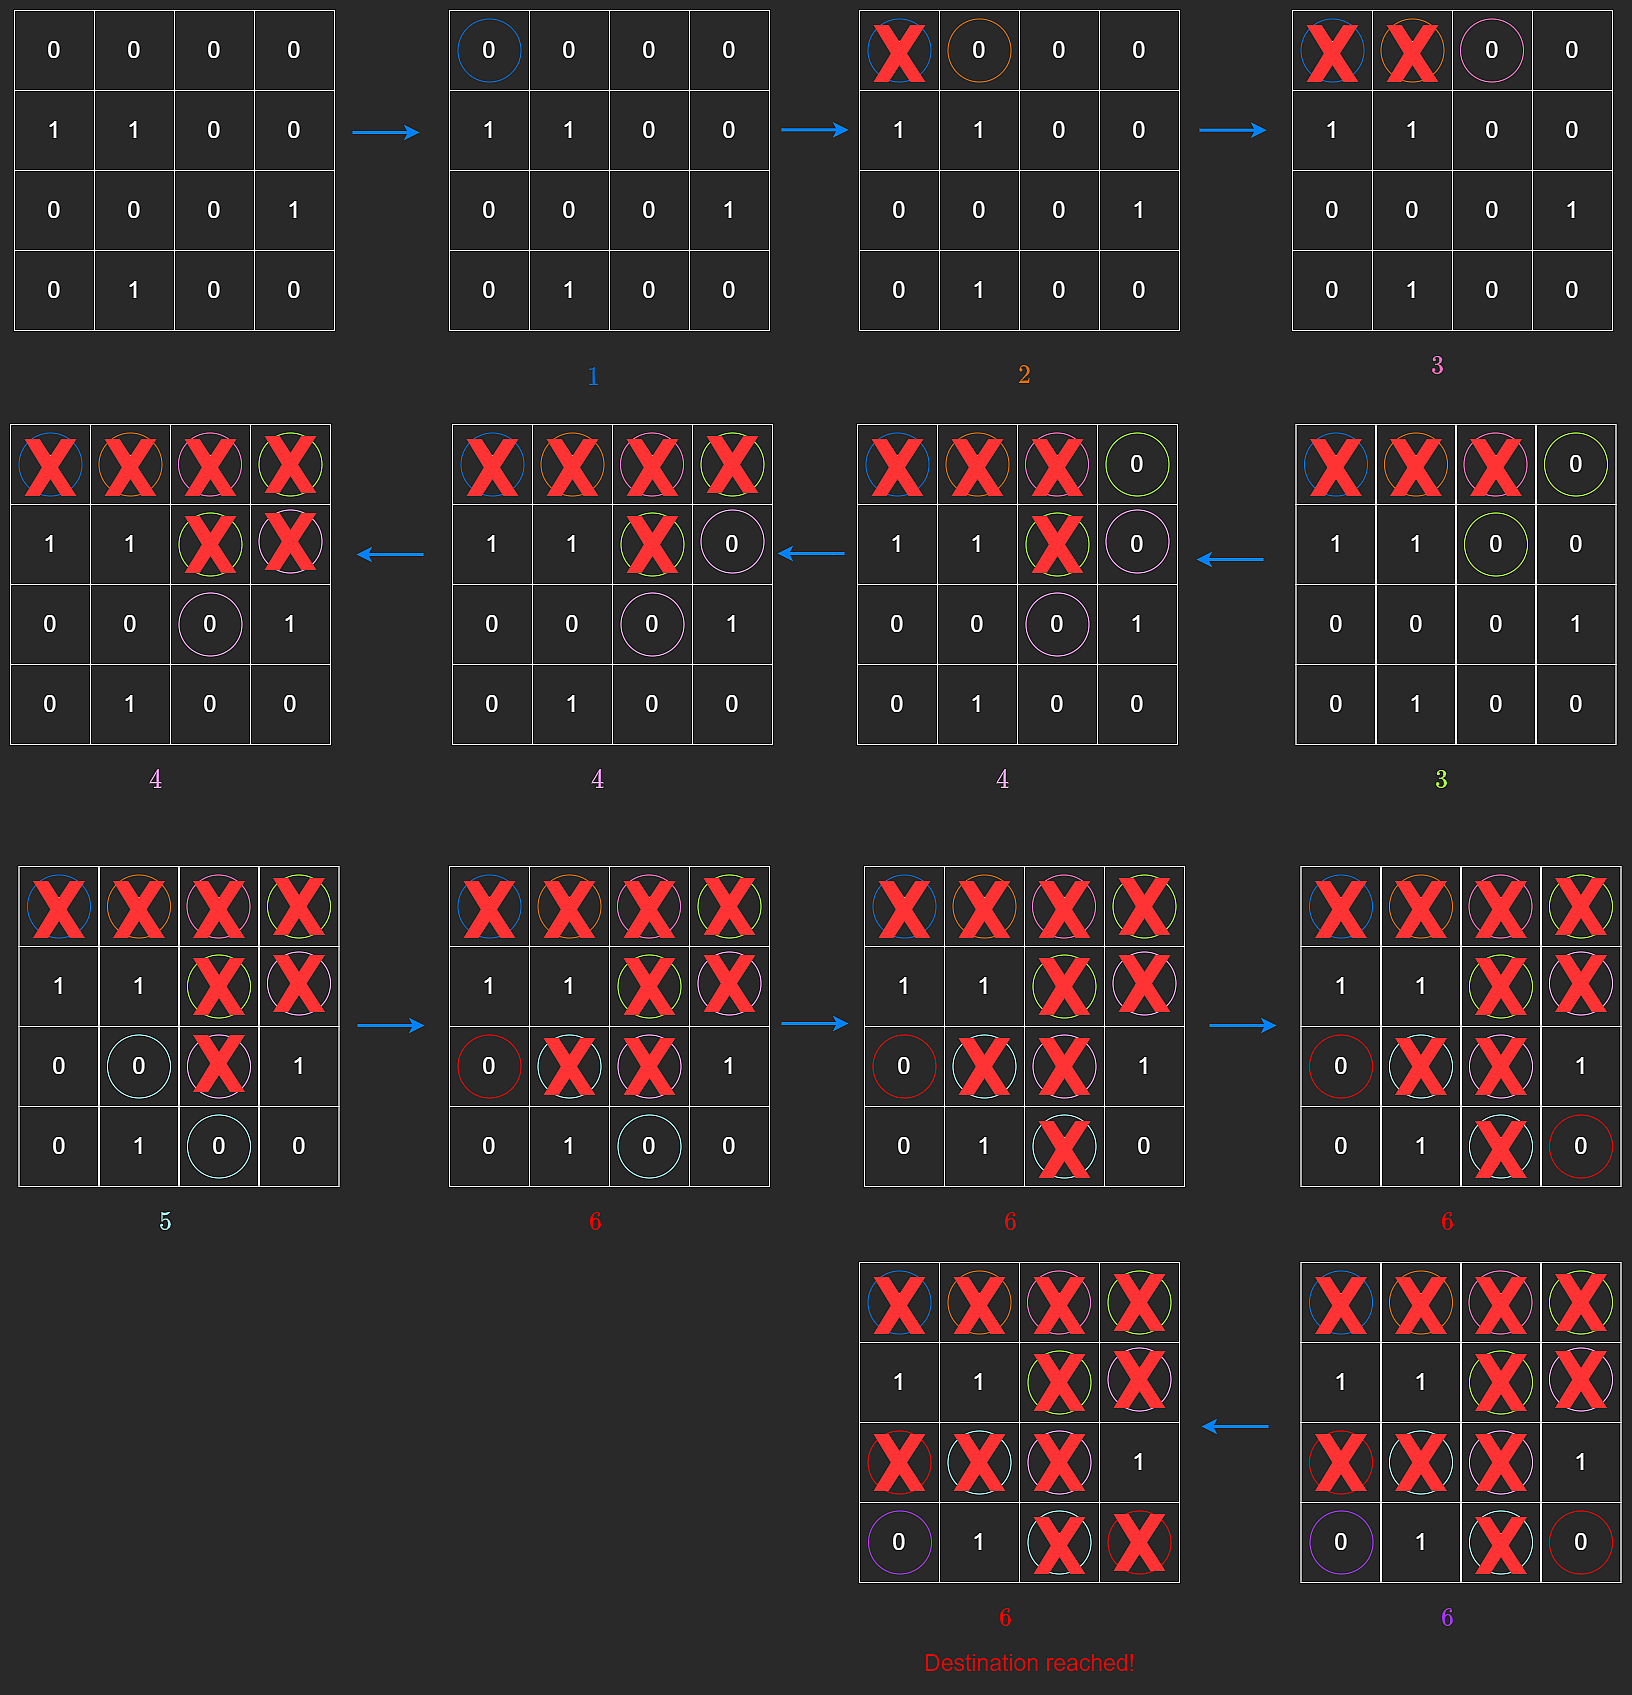

---

### Time Complexity

We never visit a coordinate twice, so worst case is visit all coords only once. This is $O(n*m)$

### Space Complexity

We store all vertices in the queue and hashset. This is both at most $n*m$ so space complexity is $O(n*m)$

---

## Problem: Shortest Path in a Binary matrix (BFS)

instead of allowing only 4 directions, we allow 8 directions now (including diagonals). Otherwise, same as shortest path question in BFS notebook.

There's 2 ways to prevent revisits (which will cause infinite loops)
- either have a `visit` hashset and make sure new explored path doesnt go into prev explored patches
- or everytime u explore a new patch with `0`, just change it to `1`

In [ ]:
#my sol
from collections import deque
class Solution:
    def shortestPathBinaryMatrix(grid):
        n, m = len(grid), len(grid[0])
        #start and end pos is wrong
        if grid[0][0]==1 or grid[n-1][m-1]==1:
            return -1
        
        visit = set()
        visit.add((0,0))
        queue = deque([(0,0)])

        #initialize length to 0
        length = 1

        #right, left, up, down
        neighbors = [[0, 1], [0, -1], [1, 0], [-1, 0],[1,1],[1,-1],[-1,1],[-1,-1]]

        #loop through our queue, level by level
        #if queue is empty after looping, means didnt find the path
        while queue:
            #on every while loop, queue object is updated!
            for i in range(len(queue)):

                #new node to consider
                r, c = queue.popleft()

                #check if weve reached target
                if r == n - 1 and c == m - 1:
                    return length
                
                #add the neighbours for the next layer
                for dr, dc in neighbors:
                    r_next, c_next = r+dr , c+dc

                    #we basically terminate this path if the below condition fulfilled
                    if (min(r_next, c_next) < 0 or
                        (r_next == n or c_next == m) or
                        (r_next, c_next) in visit or 
                        grid[r_next][c_next] == 1):
                        #break out of this loop
                        continue
                    
                    print('row,col',r,c,'to',r_next,c_next)
                    #add all its neighbours
                    queue.append((r_next, c_next))
                    visit.add((r_next, c_next))
                        
            length += 1

        #return -1 if didnt find any path
        return -1


this sol improves on the previous one, by maintaining a simpler inner `if` statement to just check for what you want instead of doing so many `continue`, will shorten speed by like 20%

In [ ]:
#better sol
from collections import deque
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        n, m = len(grid), len(grid[0])
        #start and end pos is wrong
        if grid[0][0]==1 or grid[n-1][m-1]==1:
            return -1
        
        #you cannot do set((1,2)) as this will give u {1,2,(1,2)}
        visit = set()
        visit.add((0,0))
        queue = deque([(0,0)])

        #initialize length to 0
        length = 1

        #right, left, up, down
        neighbors = [[0, 1], [0, -1], [1, 0], [-1, 0],[1,1],[1,-1],[-1,1],[-1,-1]]

        #loop through our queue, level by level
        #if queue is empty after looping, means didnt find the path
        while queue:
            #on every while loop, queue object is updated!
            for i in range(len(queue)):

                #new node to consider
                r, c = queue.popleft()

                #check if weve reached target
                if r == n - 1 and c == m - 1:
                    return length
                
                #add the neighbours for the next layer
                for dr, dc in neighbors:
                    r_next, c_next = r+dr , c+dc

                    if ((r_next>=0 and c_next>=0 and r_next<n and c_next<m) and 
                        (r_next,c_next) not in visit and
                        grid[r_next][c_next]==0):
                    
                        print('row,col',r,c,'to',r_next,c_next)
                        #add all its neighbours
                        queue.append((r_next, c_next))
                        visit.add((r_next, c_next))
                        
            length += 1

        #return -1 if didnt find any path
        return -1


this sol is even better because it doesnt need `visit` to access the hashset, just check if the new patch is `0` or not

this also gets rid of the for loop, and keeps the length information to each point instead
    - they do this by including the length information *inside* the queue tuple

In [ ]:
#EVEN BETTER SOL
from collections import deque
def shortestPathBinaryMatrix(grid):
    #grid doesnt exist
    if not grid:
        return -1

    m = len(grid)
    n=len(grid[0])

    #start position is wrong, or end position is wrong
    if grid[0][0]==1 or grid[m-1][n-1]==1:
        return -1

    #also contains the path_length
    queue = deque([(0,0,1)])
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    while queue:
        
        #this tracks previous path leng
        r,c, path_length = queue.popleft()

        #reached target
        if r == m - 1 and c == n - 1:
            return path_length

        for x, y in directions:
            nr, nc = r+x, c+y
            #within bounds and still traversing
            if nr>=0 and nc>=0 and nr<m and nc<n:
                if grid[nr][nc]==0:
                    #add current queue and increase path length
                    queue.append((nr, nc, path_length+1))
                    grid[nr][nc]=1

    return -1     

## Problem: Rotting Fruit (BFS)

You are given a 2-D matrix grid. Each cell can have one of three possible values:

- `0` representing an empty cell
- `1` representing a fresh fruit
- `2` representing a rotten fruit
Every second, if a fresh fruit is horizontally or vertically adjacent to a rotten fruit, then the fresh fruit also becomes rotten.

Return the minimum number of seconds that must elapse until there are zero fresh fruits remaining. If this state is impossible within the grid, return -1.

I faced this problem while using BFS
- in each time step, you only want the current `2` to spread. its often the case where the current `2` spread to a new `2`, that spread to a new `2` and so on

In [ ]:
from collections import deque
def orangesRotting(grid):
    q = deque()
    fresh = 0
    time = 0

    #this immediately gets ALL the rotten stuff
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 1:
                #keep track of number of fresh
                fresh += 1
            if grid[r][c] == 2:
                #this contains all the rotten ones
                q.append((r, c))

    #this is pretty smart. only find the initial rotten ones using search and keep spread from there

    directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]

    #if q is empty(weve done everything we can) and theres still fresh then this is impossible and we exit while loop
    while fresh > 0 and q:
        length = len(q)

        #this makes it so you only go over the rotten stuff IN THIS TIMESTEP
        #THIS FOR LOOP IS CRUCIAL
        for i in range(length):
            r, c = q.popleft()

            for dr, dc in directions:
                row, col = r + dr, c + dc
                if (
                    row in range(len(grid))
                    and col in range(len(grid[0]))
                    #the new ones is fresh
                    and grid[row][col] == 1
                ):
                    grid[row][col] = 2
                    #since we already have all the rotten 'seeds' or starters
                    #we are currently at a 2 - all of its neighbours must either be 0/1 or
                    #if it is a 2, it either an old 2 - old 2 already taken care of by the queue, new 2 dont need do anything
                    q.append((row, col))
                    fresh -= 1
        time += 1
    return time if fresh == 0 else -1
